## Eco 100 diagrams

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from ipywidgets import interact, interact_manual, fixed
import numpy as np


plt.style.use('bmh')
plt.rcParams["figure.figsize"] = [7,7]
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["font.size"] = 18


In [2]:
 Q = np.linspace(0.1,100,num=100)
F=10
P = 10
c = 0.1
b = 2

In [3]:
def TC(Q,F=F,c=c):
    return F + c*Q**b

def MC(Q,F=F,c=c):
    return b*c*Q**(b-1)

def profit(P,Q,F=F,c=c):
    return P*Q - TC(Q,F,c)

def isoprofplot(Q,profit=0, F=F, c=c):
    return (profit + TC(Q,F,c))/Q

def zeroprofitprice(F,c):
    Qmin = (F/c*(b-1))**(1/b)
    return MC(Qmin, F, c)

In [4]:
zeroprofitprice(100,c)

6.324555320336759

In [5]:
def firm(P,F):
    qc = (P/(b*c))**(1/(b-1))
    print(r'Qc = {:.2f},    Profit  = {:.2f}'.format(qc,profit(P,qc,F,c)))
    fig, ax = plt.subplots(3,1,figsize=(8,12))
    ax[0].plot(Q,P*Q)
    ax[0].plot(Q, TC(Q,F), lw=2.5)
    ax[0].text(90, TC(80), r'$TC$', fontsize=15)
    ax[0].text(60, P*80, r'$TR=P\cdot Q$', fontsize=15)
    ax[0].axvline(qc,linestyle='dashed')

    ax[1].plot(Q, P*Q - TC(Q,F,c))
    ax[1].axhline(0,linestyle='dashed')
    ax[1].axvline(qc,linestyle='dashed')
    ax[2].axvline(qc,linestyle='dashed')
    ax[1].set_ylim(-100,300)
  
    ax[2].axhline(P)
    ax[2].set_ylim(0,25)
    ax[2].plot(Q,MC(Q),'red')
    ax[2].set_xlabel('Q -- quantity')
    ax[2].set_ylabel('Price')
    ax[2].text(90, MC(80), r'MC', fontsize=15)
    # ax[2].plot(Q, isoprofplot(Q, profit=0, F=F,c=c))
    ax[2].axhline(zeroprofitprice(F,c), linestyle = ':')
    ax[2].text(70, zeroprofitprice(F,c)-1,'zero profit price')

Qc = 50.00,    Profit  = 150.00


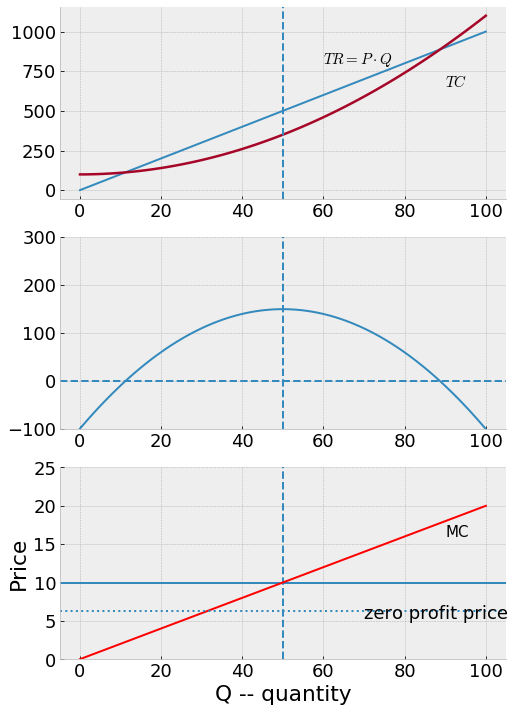

In [6]:
firm(10,100)

In [7]:
interact(firm,P=(2,15,1),F=(0,400,50))

interactive(children=(IntSlider(value=8, description='P', max=15, min=2), IntSlider(value=200, description='F'…

<function __main__.firm(P, F)>